# Mini Project 1 - Airbnb Investment in Amsterdam                    
by Wei Shen

In [22]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
import time
import datetime
warnings.filterwarnings("ignore")

In [2]:
# Import excel file
abnb = pd.read_excel('Airbnb_Data_Mini_Project_KWS.xlsx', sheet_name = 'Sheet1', header = 0, index_col=None, usecols=None)
abnb.head()

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,...,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,...,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,...,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,...,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,...,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,...,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


In [3]:
# Number of rows and columns
abnb.shape

(7833, 33)

In [4]:
# Column variables
abnb.columns

Index(['host_id', 'host_name', 'host_since_year', 'host_since_anniversary',
       'id', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'country',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'host_response_time',
       'host_response_rate', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [5]:
# To check missing data
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7833 non-null   int64  
 1   host_name                    7833 non-null   object 
 2   host_since_year              7833 non-null   int64  
 3   host_since_anniversary       7833 non-null   object 
 4   id                           7833 non-null   int64  
 5   neighbourhood_cleansed       7833 non-null   object 
 6   city                         7833 non-null   object 
 7   state                        7825 non-null   object 
 8   zipcode                      7660 non-null   object 
 9   country                      7833 non-null   object 
 10  latitude                     7833 non-null   float64
 11  longitude                    7833 non-null   float64
 12  property_type                7833 non-null   object 
 13  room_type         

In [6]:
# # Correlation between variables
# import seaborn as sns
# mask = np.tril(abnb.corr())
# sns.set(rc={'figure.figsize':(15, 10)})
# ax = sns.heatmap(abnb.corr(), fmt='.1g', annot=True, cmap= 'Greens', mask=mask)

In [7]:
# Check city
abnb['city'].unique()

array(['Amsterdam', 'De Pijp', 'WZ', 'Jordaan', 'Amstelveen',
       'Bos en Lommer', 'Amsterdam-Zuidoost', 'Zeeburg',
       'Watergraafsmeer', 'Amsterddam', 'Amsterdam (Zunderdorp)',
       'Duivendrecht', 'Osdorp', 'Slotervaart', 'Diemen', 'Landsmeer',
       'Amsterdam Zuidoost', 'North Holland', 'EC Amsterdam',
       'Amsterdam, De Baarsjes', 'Amsterdam ', 'Amsterdam > Oud West',
       'Badhoevedorp', 'Amsterdam- Zuidoost', 'Ã\x81msterdam', 'Halfweg',
       'amsterdam', 'Amsterdam / Diemen', 'Amsterdam Zuid-Oost',
       'Jordaan, Amsterdam', 'Nederland',
       'Amsterdam, Rivierenbuurt, Scheldebuurt', 'é˜¿å§†æ–¯ç‰¹ä¸¹',
       'Ð\x90Ð¼Ñ\x81Ñ‚ÐµÑ€Ð´Ð°Ð¼', 'Amsterdam Netherlands'], dtype=object)

In [8]:
# Check state
abnb['state'].unique()

array(['North Holland', 'Noord-Holland', 'NH', nan, 'Amsterdam',
       'Noord holland', 'Jordaan', 'Noordholland', 'Northholland',
       'Noord Holland', 'Jordaan Amsterdam', 'Holland',
       'Nieuwe Hoogstraat', 'Daniel Stalpertstraat', 'Jordaan/center',
       'GN', 'SV', 'XH', 'Nl', 'Olanda Settentrionale', 'NC', 'MH', 'Bx'],
      dtype=object)

In [9]:
# Check neighbourhood
abnb['neighbourhood_cleansed'].unique()

array(['Westerpark', 'Oostelijk Havengebied - Indische Buurt',
       'De Baarsjes - Oud-West', 'Centrum-Oost', 'Centrum-West', 'Zuid',
       'De Pijp - Rivierenbuurt', 'Bos en Lommer', 'Watergraafsmeer',
       'Slotervaart', 'Oud-Oost', 'IJburg - Zeeburgereiland',
       'Buitenveldert - Zuidas', 'Oud-Noord', 'Noord-Oost', 'Osdorp',
       'Geuzenveld - Slotermeer', 'De Aker - Nieuw Sloten',
       'Gaasperdam - Driemond', 'Noord-West', 'Bijlmer-Oost',
       'Bijlmer-Centrum'], dtype=object)

In [10]:
# Number of neighbourhood
len(abnb['neighbourhood_cleansed'].unique())

22

In [11]:
# Check property type
abnb['property_type'].unique()

array(['Apartment', 'House', 'Loft', 'Boat', 'Bed & Breakfast',
       'Camper/RV', 'Villa', 'Cabin', 'Other', 'Chalet', 'Earth House',
       'Yurt', 'Treehouse', 'Hut', 'Dorm'], dtype=object)

In [12]:
# Number of property type
len(abnb['property_type'].unique())

15

## Project Step 1: Preparing Dataset

In [13]:
# Calculate host account age
# Combine the "host_since_year" column & "host_since_anniversary" to get full date
abnb["fulldate"] = abnb["host_since_year"].astype(str) + "/" + abnb["host_since_anniversary"].astype(str)

In [14]:
# Check starting date
abnb["fulldate"].head(1)

0    2008/8/11
Name: fulldate, dtype: object

In [15]:
# Check Last date
abnb["fulldate"].tail(1)

7832    2015/4/4
Name: fulldate, dtype: object

In [16]:
datetime.date.today()

datetime.date(2021, 9, 18)

In [24]:
# Eldest host account age
# Calculate time passed 
from datetime import date
d0 = date(2008, 8, 11)
d1 = date(2021, 9, 16)
delta = d1 - d0
print('Time passed = ', delta.days, 'days')

Time passed =  4784 days


In [25]:
# Eldest host account age
# Python program to convert 
# given number of days to years, months and days

# Reading number of days from user
number_of_days = int(input("Enter number of days: "))

# Calculating years
years = number_of_days // 365

# Calculating months
months = (number_of_days - years *365) // 30

# Calculating days
days = (number_of_days - years * 365 - months*30)

# Displaying results
print("Years = ", years), 
print("Months = ", months)
print("Days = ", days)

Enter number of days: 4784
Years =  13
Months =  1
Days =  9


In [26]:
# Youngest host account age
# Calculate time passed 
d0 = date(2015, 4, 4)
d1 = date(2021, 9, 16)
delta = d1 - d0
print('Time passed = ', delta.days, 'days')

Time passed =  2357 days


In [27]:
# Youngest host account age
# Python program to convert 
# given number of days to years, months and days

# Reading number of days from user
number_of_days = int(input("Enter number of days: "))

# Calculating years
years = number_of_days // 365

# Calculating months
months = (number_of_days - years *365) // 30

# Calculating days
days = (number_of_days - years * 365 - months*30)

# Displaying results
print("Years = ", years)
print("Months = ", months)
print("Days = ", days)

Enter number of days: 2357
Years =  6
Months =  5
Days =  17


- Data Cleanse

In [28]:
# Checking column with missing values
# Alterantive check NA : abnb.isna().sum()
abnb.isnull().sum()

host_id                           0
host_name                         0
host_since_year                   0
host_since_anniversary            0
id                                0
neighbourhood_cleansed            0
city                              0
state                             8
zipcode                         173
country                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        69
bedrooms                         14
beds                             13
bed_type                          0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              732
host_response_rate              732
number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy      

In [29]:
# To empty value with 0
abnb.fillna(0,inplace=True)

In [30]:
# To validate no empty value
abnb.isna().sum()

host_id                        0
host_name                      0
host_since_year                0
host_since_anniversary         0
id                             0
neighbourhood_cleansed         0
city                           0
state                          0
zipcode                        0
country                        0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
host_response_time             0
host_response_rate             0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_sco

In [31]:
# Remove listings wihout any review
abnb = abnb[abnb.number_of_reviews > 0] 
abnb.shape

(6209, 34)

In [32]:
# Remove duplicate data in ID
abnb = abnb.drop_duplicates(subset='id', keep='first')
abnb.shape

(6192, 34)

In [33]:
#Removing redundant variables
#abnb.drop(['id','host_name','number_of_reviews'],axis=1,inplace=True)
#abnb.head()

In [34]:
# Standardize entry "state" & "city" (North Holland)
state_error = {'^N.*H$','^No.*land$','Noord-Holland','Noord Holland','Noord holland','Noordholland','Northholland'}
abnb['state'] = abnb['state'].replace('^N.*H$','North Holland')
abnb['state'] = abnb['state'].replace('^No.*land$','North Holland')
abnb['state'] = abnb['state'].replace('Noord-Holland','North Holland')
abnb['state'] = abnb['state'].replace('Noord Holland','North Holland')
abnb['state'] = abnb['state'].replace('Noord holland','North Holland')    
abnb['state'] = abnb['state'].replace('Noordholland','North Holland') 
abnb['state'] = abnb['state'].replace('Northholland','North Holland') 

In [35]:
# Standardize entry "state" & "city" (Jordaan)
state_error_2 = {'^Jo', 'Jordaan Amsterdam'}
abnb['state'] = abnb['state'].replace('^Jo','Jordaan')
abnb['state'] = abnb['state'].replace('Jordaan Amsterdam','Jordaan')

In [36]:
# To validate the state change
# Noord-Holland, Noord holland, NH, Noordholland, Noord Holland / Jordaan Amsterdam
abnb_check_state = abnb[abnb.state == "Noord-Holland"] 
abnb_check_state.shape 

(0, 34)

In [37]:
# Standardize entry "state" & "city" (Amsterdam)
city_error = {'^Ams.*m$','^Am.*n$','Amstelveen', 'Amsterddam','Amsterdam (Zunderdorp)', 'amsterdam','Amsterdam Netherlands'}
abnb['city'] =abnb['city'].replace('city_error','Amsterdam')
abnb['city'] =abnb['city'].replace('^Ams.*m$','Amsterdam')
abnb['city'] =abnb['city'].replace('^Am.*n$','Amsterdam')
abnb['city'] =abnb['city'].replace('Amstelveen','Amsterdam')
abnb['city'] =abnb['city'].replace('Amsterddam','Amsterdam')
abnb['city'] =abnb['city'].replace('Amsterdam (Zunderdorp)','Amsterdam')
abnb['city'] =abnb['city'].replace('amsterdam','Amsterdam')
abnb['city'] =abnb['city'].replace('Amsterdam Netherlands','Amsterdam')

In [38]:
# Alternative:
# Standardize entry "state" & "city" (Amsterdam)
abnb['city'].replace(['De Pijp', 'Jordaan', 'Bos en Lommer',
       'Amsterdam-Zuidoost', 'Watergraafsmeer', 'Zeeburg', 'Amsterddam',
       'Osdorp', 'Slotervaart',
       'Amsterdam Zuidoost', 'North Holland',
       'EC Amsterdam', 'Amsterdam, De Baarsjes', 'Amsterdam ',
       'Amsterdam > Oud West', 'Amsterdam- Zuidoost',
       'Ã\x81msterdam', 'amsterdam', 'Jordaan, Amsterdam',
       'Amstelveen', 'Nederland',
       'Amsterdam, Rivierenbuurt, Scheldebuurt',
       'Ð\x90Ð¼Ñ\x81Ñ‚ÐµÑ€Ð´Ð°Ð¼', 'Amsterdam Netherlands',
       'Amsterdam Zuid-Oost'], 'Amsterdam',inplace = True )

In [39]:
abnb['city'].unique()

array(['Amsterdam', 'Diemen', 'Landsmeer', 'Duivendrecht', 'Badhoevedorp',
       'Halfweg'], dtype=object)

In [40]:
abnb['state'].unique()

array(['North Holland', 'NH', 'Amsterdam', 'Jordaan', 0, 'Holland',
       'Nieuwe Hoogstraat', 'Jordaan/center', 'GN', 'Nl',
       'Olanda Settentrionale', 'NC', 'Bx'], dtype=object)

In [41]:
# To validate the city change
# Amstelveen, Amsterddam, Amsterdam (Zunderdorp)
abnb_check_city = abnb[abnb.state == "Amstelveen"] 
abnb_check_city.shape

(0, 34)

## Project Step 2: Data Exploration & Analysis

### PROMPT 1: How much revenue per listing

Estimate revenue per listing(each row is considered a listing)

In [42]:
# Create dataframe for revenue
abnb_rev = abnb[['id','host_id','host_name','host_since_year','neighbourhood_cleansed','property_type','room_type','price','number_of_reviews','accommodates','guests_included', 'extra_people', 'minimum_nights','room_type','bedrooms','review_scores_rating']]

In [43]:
abnb_rev

,id,host_id,host_name,host_since_year,neighbourhood_cleansed,property_type,room_type,price,number_of_reviews,accommodates,guests_included,extra_people,minimum_nights,room_type,bedrooms,review_scores_rating
0,304958,1662,Chloe,2008,Westerpark,Apartment,Entire home/apt,130,11,4,4,10,4,Entire home/apt,2.0,98.0
1,2818,3159,Daniel,2008,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,59,108,2,1,10,3,Private room,1.0,97.0
2,103026,3718,Britta,2008,De Baarsjes - Oud-West,Apartment,Entire home/apt,95,15,4,2,25,3,Entire home/apt,1.0,92.0
3,550017,4716,Stefan,2008,Centrum-Oost,Apartment,Entire home/apt,100,20,2,1,10,2,Entire home/apt,1.0,97.0
4,4728389,5271,Tyler,2008,Centrum-West,Apartment,Entire home/apt,250,1,6,2,25,2,Entire home/apt,2.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,5757551,29867555,Roel,2015,Bos en Lommer,Apartment,Entire home/apt,69,1,2,1,0,1,Entire home/apt,0.0,100.0
7777,5766425,29916807,Merel,2015,Westerpark,Apartment,Entire home/apt,120,1,4,2,25,2,Entire home/apt,2.0,0.0
7783,5773449,29939478,Arthur,2015,Oud-Oost,Apartment,Private room,59,3,2,1,10,1,Private room,1.0,87.0
7788,5780159,29987963,Wilfred,2015,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,93,1,2,1,0,1,Private room,1.0,100.0


In [44]:
# # Drop listings without reviews (If not completed in data cleaning)
# abnb_rev.number_of_reviews.replace(0, np.nan, inplace=True)
# abnb_rev = abnb_rev.dropna()
# abnb_rev.info()

In [45]:
# Proxy number of stays for each listing 
abnb_rev["est_num_stays"] = abnb_rev["number_of_reviews"] * 2

In [47]:

# #1    (abnb['guests_included'] > 1) & (abnb['accommodates'] > 1), # Price quote not included 2 or more ppl.
                                               # est_daily_rev = ((guests_included - 2) * extra_people) + price
    
# #2    (abnb['guests_included'] == 1 ) & (abnb['accommodates'] == 1),
                                               # est_daily_rev = price
    
# #3   (abnb['guests_included'] == 1 ) & (abnb['accommodates'] > 1),
                                               # est_daily_rev = extra_people + price

# #4   (abnb['guests_included'] == 0 ) ]
                                               # est_daily_rev = price


In [49]:
# Estimatate daily revenue:

est_daily_rev = []
def f(row):
    if row["guests_included"] == 1:
        if row["accommodates"] == 1:
            est_daily_rev = row["price"]
        elif row["accommodates"] > 1:
            est_daily_rev = row["extra_people"] + row["price"]
    elif row["guests_included"] > 1:
        est_daily_rev = ((row["guests_included"] - 2) * row["extra_people"]) + row["price"]
    else:
        est_daily_rev = row["price"]
    return est_daily_rev

In [50]:
# Create column of " estimated daily revenue":
abnb_rev["est_daily_rev"] = abnb_rev.apply(f,axis=1) 

In [51]:
# Create column of "estimated revenue per booking":
abnb_rev["rev_per_book"] = abnb_rev["est_daily_rev"] * abnb_rev["minimum_nights"]

In [52]:
# Create column of "estimated total revenue":
abnb_rev["est_total_rev"] = abnb_rev["rev_per_book"] * abnb_rev["est_num_stays"]

In [53]:
# Review abnb revenue dataframe
abnb_rev

,id,host_id,host_name,host_since_year,neighbourhood_cleansed,property_type,room_type,price,number_of_reviews,accommodates,guests_included,extra_people,minimum_nights,room_type,bedrooms,review_scores_rating,est_num_stays,est_daily_rev,rev_per_book,est_total_rev
0,304958,1662,Chloe,2008,Westerpark,Apartment,Entire home/apt,130,11,4,4,10,4,Entire home/apt,2.0,98.0,22,150,600,13200
1,2818,3159,Daniel,2008,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,59,108,2,1,10,3,Private room,1.0,97.0,216,69,207,44712
2,103026,3718,Britta,2008,De Baarsjes - Oud-West,Apartment,Entire home/apt,95,15,4,2,25,3,Entire home/apt,1.0,92.0,30,95,285,8550
3,550017,4716,Stefan,2008,Centrum-Oost,Apartment,Entire home/apt,100,20,2,1,10,2,Entire home/apt,1.0,97.0,40,110,220,8800
4,4728389,5271,Tyler,2008,Centrum-West,Apartment,Entire home/apt,250,1,6,2,25,2,Entire home/apt,2.0,100.0,2,250,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7770,5757551,29867555,Roel,2015,Bos en Lommer,Apartment,Entire home/apt,69,1,2,1,0,1,Entire home/apt,0.0,100.0,2,69,69,138
7777,5766425,29916807,Merel,2015,Westerpark,Apartment,Entire home/apt,120,1,4,2,25,2,Entire home/apt,2.0,0.0,2,120,240,480
7783,5773449,29939478,Arthur,2015,Oud-Oost,Apartment,Private room,59,3,2,1,10,1,Private room,1.0,87.0,6,69,69,414
7788,5780159,29987963,Wilfred,2015,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,93,1,2,1,0,1,Private room,1.0,100.0,2,93,93,186


In [54]:
# To validate est_daily_rev: if guests_included = 1 & accommodates > 1 est_daily_rev = extra_people + price
abnb_rev[abnb_rev["host_id"] == 6272737]

,id,host_id,host_name,host_since_year,neighbourhood_cleansed,property_type,room_type,price,number_of_reviews,accommodates,guests_included,extra_people,minimum_nights,room_type,bedrooms,review_scores_rating,est_num_stays,est_daily_rev,rev_per_book,est_total_rev
3357,1253770,6272737,Freek,2013,Centrum-Oost,Apartment,Entire home/apt,55,2,6,1,45,1,Entire home/apt,2.0,100.0,4,100,100,400


In [55]:
# Sorting Top 5 Revenue Listing
abnb_rev.sort_values(by='est_total_rev', ascending=False).head(5)

,id,host_id,host_name,host_since_year,neighbourhood_cleansed,property_type,room_type,price,number_of_reviews,accommodates,guests_included,extra_people,minimum_nights,room_type,bedrooms,review_scores_rating,est_num_stays,est_daily_rev,rev_per_book,est_total_rev
1312,466030,2314737,Daan,2012,Centrum-West,House,Entire home/apt,180,180,4,2,30,7,Entire home/apt,2.0,97.0,360,180,1260,453600
901,297220,1532319,Anand,2011,Centrum-Oost,Apartment,Entire home/apt,123,50,2,2,0,19,Entire home/apt,1.0,97.0,100,123,2337,233700
572,731834,965667,Sharon,2011,De Baarsjes - Oud-West,Apartment,Entire home/apt,240,89,6,4,40,3,Entire home/apt,2.0,97.0,178,320,960,170880
724,311507,1294098,Fernando,2011,Centrum-West,House,Entire home/apt,230,53,4,6,0,7,Entire home/apt,2.0,99.0,106,230,1610,170660
1037,510836,1826139,Esther & Jan,2012,Centrum-West,Apartment,Entire home/apt,500,54,15,8,40,2,Entire home/apt,5.0,97.0,108,740,1480,159840


Pivot Tables:

In [56]:
# Create pivot table
pvt_table = abnb_rev.pivot_table(index=['host_id','host_since_year','host_name'], values=['est_total_rev'], aggfunc=['sum','count'])
pvt_table.head()

,,,sum,count
,,,est_total_rev,est_total_rev
host_id,host_since_year,host_name,,
1662,2008,Chloe,13200,1
3159,2008,Daniel,44712,1
3718,2008,Britta,8550,1
4716,2008,Stefan,8800,1
5271,2008,Tyler,1920,2


In [57]:
# To validate pivot table results
abnb_rev[abnb_rev["host_name"] == "Tyler"]

,id,host_id,host_name,host_since_year,neighbourhood_cleansed,property_type,room_type,price,number_of_reviews,accommodates,guests_included,extra_people,minimum_nights,room_type,bedrooms,review_scores_rating,est_num_stays,est_daily_rev,rev_per_book,est_total_rev
4,4728389,5271,Tyler,2008,Centrum-West,Apartment,Entire home/apt,250,1,6,2,25,2,Entire home/apt,2.0,100.0,2,250,500,1000
6,5181918,5271,Tyler,2008,Centrum-West,Apartment,Private room,115,4,2,1,0,1,Private room,1.0,95.0,8,115,115,920


In [58]:
# Return an Index of values for requested level.
pvt_table.columns = pvt_table.columns.get_level_values(0)
pvt_table.columns = [' '.join(col).strip() for col in pvt_table.columns.values]
pvt_table = pvt_table.reset_index()
pvt_table.head()

,host_id,host_since_year,host_name,s u m,c o u n t
0,1662,2008,Chloe,13200,1
1,3159,2008,Daniel,44712,1
2,3718,2008,Britta,8550,1
3,4716,2008,Stefan,8800,1
4,5271,2008,Tyler,1920,2


In [59]:
# Rename columns
pvt_table = pvt_table.rename(columns={'s u m': 'est_total_rev', 'c o u n t': 'num_of_listing'})
pvt_table.head()

,host_id,host_since_year,host_name,est_total_rev,num_of_listing
0,1662,2008,Chloe,13200,1
1,3159,2008,Daniel,44712,1
2,3718,2008,Britta,8550,1
3,4716,2008,Stefan,8800,1
4,5271,2008,Tyler,1920,2


In [60]:
# Create Top 10 Host with Highest Estimated Total Revenue
top_10_rev = pvt_table.sort_values(by="est_total_rev",ascending=False).head(10)
top_10_rev

,host_id,host_since_year,host_name,est_total_rev,num_of_listing
358,965667,2011,Sharon,535200,4
23,77484,2010,Annelies,518490,14
2514,6999042,2013,Douwe&Niki,484744,65
814,2314737,2012,Daan,453600,1
2110,5796250,2013,Remco,439320,12
248,669178,2011,Peter,413004,12
654,1829492,2012,Fred & Wietske,322950,17
652,1826139,2012,Esther & Jan,322040,3
1999,5436352,2013,Centina,312486,5
446,1294098,2011,Fernando,253724,3


In [61]:
# Re-style revenue in currency format
top_10_rev_euro = top_10_rev.style.format({"est_total_rev": "€{:20,.0f}" })
top_10_rev_euro 

,host_id,host_since_year,host_name,est_total_rev,num_of_listing
358,965667,2011,Sharon,"€ 535,200",4
23,77484,2010,Annelies,"€ 518,490",14
2514,6999042,2013,Douwe&Niki,"€ 484,744",65
814,2314737,2012,Daan,"€ 453,600",1
2110,5796250,2013,Remco,"€ 439,320",12
248,669178,2011,Peter,"€ 413,004",12
654,1829492,2012,Fred & Wietske,"€ 322,950",17
652,1826139,2012,Esther & Jan,"€ 322,040",3
1999,5436352,2013,Centina,"€ 312,486",5
446,1294098,2011,Fernando,"€ 253,724",3


Text(0.5, 1.0, 'Top 10 Hosts by Revenue')

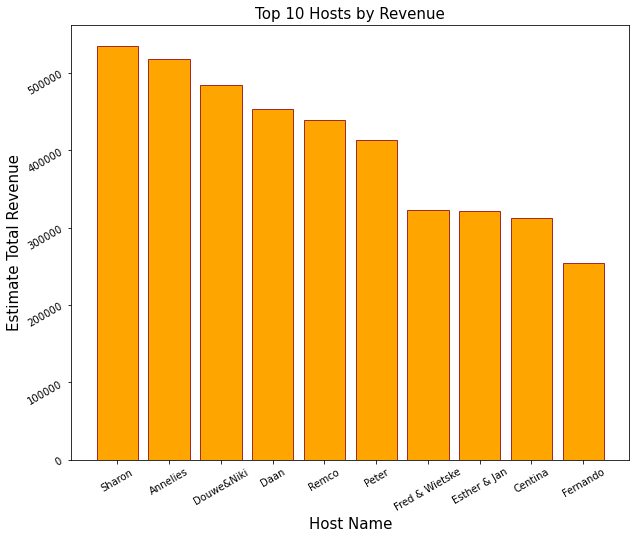

In [62]:
# Create bar chart
plt.figure(figsize=(10,8))
plt.bar(top_10_rev['host_name'], top_10_rev['est_total_rev'], width=0.8, color='Orange',edgecolor='Brown', align='center')
plt.xlabel('Host Name', fontsize=15)
plt.ylabel('Estimate Total Revenue', fontsize=15)
plt.xticks(fontsize=10, rotation=30)
plt.yticks(fontsize=10, rotation=30)
plt.title('Top 10 Hosts by Revenue', fontsize=15)

In [63]:
# Listing by top host- Sharon
abnb_rev[abnb_rev["host_id"] == 965667]

,id,host_id,host_name,host_since_year,neighbourhood_cleansed,property_type,room_type,price,number_of_reviews,accommodates,guests_included,extra_people,minimum_nights,room_type,bedrooms,review_scores_rating,est_num_stays,est_daily_rev,rev_per_book,est_total_rev
572,731834,965667,Sharon,2011,De Baarsjes - Oud-West,Apartment,Entire home/apt,240,89,6,4,40,3,Entire home/apt,2.0,97.0,178,320,960,170880
573,789743,965667,Sharon,2011,De Baarsjes - Oud-West,Apartment,Entire home/apt,230,82,6,4,40,3,Entire home/apt,2.0,97.0,164,310,930,152520
574,814967,965667,Sharon,2011,Centrum-West,Apartment,Entire home/apt,210,58,6,4,40,3,Entire home/apt,2.0,91.0,116,290,870,100920
575,814939,965667,Sharon,2011,Centrum-West,Apartment,Entire home/apt,200,66,6,4,40,3,Entire home/apt,2.0,92.0,132,280,840,110880


### PROMPT 2: Which property types receive the most positive reviews?

In [64]:
# Create property types dataframe
abnb_type = abnb[['id','property_type','host_name', 'host_id', 'neighbourhood_cleansed','review_scores_rating','number_of_reviews','price','guests_included', 'extra_people','minimum_nights', 'accommodates']]
abnb_type.head()

,id,property_type,host_name,host_id,neighbourhood_cleansed,review_scores_rating,number_of_reviews,price,guests_included,extra_people,minimum_nights,accommodates
0,304958,Apartment,Chloe,1662,Westerpark,98.0,11,130,4,10,4,4
1,2818,Apartment,Daniel,3159,Oostelijk Havengebied - Indische Buurt,97.0,108,59,1,10,3,2
2,103026,Apartment,Britta,3718,De Baarsjes - Oud-West,92.0,15,95,2,25,3,4
3,550017,Apartment,Stefan,4716,Centrum-Oost,97.0,20,100,1,10,2,2
4,4728389,Apartment,Tyler,5271,Centrum-West,100.0,1,250,2,25,2,6


In [65]:
# # Remove listing without 'reviews' (Completed in data cleaning)
# abnb_type.dropna(subset=['number_of_reviews'], inplace=True)
# abnb_type.shape

In [66]:
# Replace '0' with nan values first 
abnb_type['review_scores_rating'].replace(0.0, np.nan, inplace=True)
abnb_type.shape

(6192, 12)

In [67]:
# To check for nan values
abnb_type.isna().sum()

id                         0
property_type              0
host_name                  0
host_id                    0
neighbourhood_cleansed     0
review_scores_rating      74
number_of_reviews          0
price                      0
guests_included            0
extra_people               0
minimum_nights             0
accommodates               0
dtype: int64

In [68]:
# To fill review_scores_rating  with the mean value
abnb_type['review_scores_rating'] = abnb_type['review_scores_rating'].fillna((abnb_type['review_scores_rating'].mean()))
abnb_type.isnull().sum()

id                        0
property_type             0
host_name                 0
host_id                   0
neighbourhood_cleansed    0
review_scores_rating      0
number_of_reviews         0
price                     0
guests_included           0
extra_people              0
minimum_nights            0
accommodates              0
dtype: int64

In [69]:
# # To remove Nan values in 'property_type [DONE]
# abnb_type.dropna(subset=['property_type'], inplace=True)

In [70]:
# # To check if Nan values in 'property_type ' is now dropped [DONE]
# abnb_type.isnull().sum()

In [71]:
conditions = [
    (abnb_type.review_scores_rating > 70.00),
    (abnb_type.review_scores_rating < 70.00 )]

choices = ['positive', 'negative']

abnb_type['review_status'] = np.select(conditions, choices, default='null')
abnb_type.tail(10)

,id,property_type,host_name,host_id,neighbourhood_cleansed,review_scores_rating,number_of_reviews,price,guests_included,extra_people,minimum_nights,accommodates,review_status
7724,5655494,Apartment,Annemarie,29311072,De Baarsjes - Oud-West,80.000000,2,59,1,20,1,2,positive
7728,5665673,Apartment,Dennis Yiannis,29370476,Centrum-West,100.000000,1,300,4,50,1,7,positive
7736,5687928,Bed & Breakfast,Maarten,29469581,Centrum-Oost,100.000000,1,60,1,0,1,2,positive
7742,5700506,Loft,Jeanne,29556599,Centrum-West,100.000000,1,105,1,0,3,2,positive
7753,5718834,Apartment,Iman,29650604,Centrum-Oost,100.000000,1,69,1,25,4,2,positive
7770,5757551,Apartment,Roel,29867555,Bos en Lommer,100.000000,1,69,1,0,1,2,positive
7777,5766425,Apartment,Merel,29916807,Westerpark,93.337365,1,120,2,25,2,4,positive
7783,5773449,Apartment,Arthur,29939478,Oud-Oost,87.000000,3,59,1,10,1,2,positive
7788,5780159,Apartment,Wilfred,29987963,Oostelijk Havengebied - Indische Buurt,100.000000,1,93,1,0,1,2,positive
7809,5829776,Apartment,Marijke,30260408,Oostelijk Havengebied - Indische Buurt,100.000000,1,80,1,0,2,2,positive


In [72]:
# To check is any negative review
abnb_type_negative = abnb_type[abnb_type["review_status"] == 'negative']
abnb_type_negative.head()

,id,property_type,host_name,host_id,neighbourhood_cleansed,review_scores_rating,number_of_reviews,price,guests_included,extra_people,minimum_nights,accommodates,review_status
51,4069573,Boat,Wim,82145,De Pijp - Rivierenbuurt,40.0,1,206,4,50,3,10,negative
1107,2506021,Apartment,Agnes,1934192,De Baarsjes - Oud-West,60.0,2,160,1,0,1,4,negative
1108,386479,Bed & Breakfast,Agnes,1934192,Westerpark,64.0,19,90,2,25,1,3,negative
1109,392003,Bed & Breakfast,Agnes,1934192,De Baarsjes - Oud-West,57.0,26,50,1,20,1,2,negative
1746,790705,Apartment,Daphne,3175842,Centrum-Oost,50.0,2,310,4,50,3,4,negative


In [73]:
# Pivot table to show positive and negative reviews by 'property type'
types_reviews = abnb_type.pivot_table(index=['property_type', 'review_status', 'review_scores_rating'], values=['host_id'], aggfunc=['count'])                                                                                                       
types_reviews.head(25)

count
                                                 host_id
property_type review_status review_scores_rating        
Apartment     negative      20.0                       6
                            40.0                       3
                            45.0                       2
                            47.0                       1
                            50.0                       2
                            51.0                       1
                            52.0                       1
                            56.0                       1
                            60.0                      29
                            63.0                       2
                            65.0                       3
                            67.0                       5
                            69.0                       1
              null          70.0                      12
              positive      71.0                       1
                            72.0                       1
                            73.0                      15
                            74.0                       1
                            75.0                      11
                            76.0                       7
                            77.0                      11
                            78.0                       9
                            79.0                      11
                            80.0                     244
                            81.0                       4

In [74]:
# Create dataframe of  property types with only positive review 
abnb_type_positive = abnb_type[abnb_type["review_status"] == 'positive']
abnb_type_positive.shape

(6101, 13)

In [75]:
# Create positive review pivot table of property types
top_pos_reviews  = abnb_type_positive.pivot_table(index=['property_type', 'review_status', 'review_scores_rating'], values=['host_id'], aggfunc=['count'])                                                                                                       
top_pos_reviews 

count
                                                 host_id
property_type review_status review_scores_rating        
Apartment     positive      71.0                       1
                            72.0                       1
                            73.0                      15
                            74.0                       1
                            75.0                      11
...                                                  ...
Villa         positive      92.0                       1
                            94.0                       1
                            95.0                       1
                            100.0                      1
Yurt          positive      80.0                       1

[156 rows x 1 columns]

In [76]:
# Create pivot table for average rating
pvt_avg_rating = abnb_type_positive.pivot_table(index=['property_type'], values=['review_scores_rating'], aggfunc=['mean', 'max','count'])
pvt_avg_rating.sort_values(by='property_type', ascending=True)

,mean,max,count
,review_scores_rating,review_scores_rating,review_scores_rating
property_type,,,
Apartment,93.903709,100.0,4958
Bed & Breakfast,92.946943,100.0,270
Boat,94.242783,100.0,265
Cabin,88.625000,100.0,8
Camper/RV,91.666667,100.0,9
Chalet,100.000000,100.0,1
Dorm,95.000000,100.0,2
Earth House,94.000000,94.0,1


In [77]:
# Reset index
pvt_avg_rating =  pvt_avg_rating.reset_index()
pvt_avg_rating.columns =  pvt_avg_rating.columns.get_level_values(0)
pvt_avg_rating

,property_type,mean,max,count
0,Apartment,93.903709,100.0,4958
1,Bed & Breakfast,92.946943,100.0,270
2,Boat,94.242783,100.0,265
3,Cabin,88.625000,100.0,8
4,Camper/RV,91.666667,100.0,9
5,Chalet,100.000000,100.0,1
6,Dorm,95.000000,100.0,2
7,Earth House,94.000000,94.0,1
8,House,94.209051,100.0,504
9,Hut,92.000000,92.0,1


In [78]:
# Rename columns
pvt_avg_rating.rename(columns = {'mean': 'avg_rating','max': 'max_rating','count': 'num_of_listing' }, inplace = True) 
pvt_avg_rating

,property_type,avg_rating,max_rating,num_of_listing
0,Apartment,93.903709,100.0,4958
1,Bed & Breakfast,92.946943,100.0,270
2,Boat,94.242783,100.0,265
3,Cabin,88.625000,100.0,8
4,Camper/RV,91.666667,100.0,9
5,Chalet,100.000000,100.0,1
6,Dorm,95.000000,100.0,2
7,Earth House,94.000000,94.0,1
8,House,94.209051,100.0,504
9,Hut,92.000000,92.0,1


In [79]:
# Top 5 property type with most positive reviews
pvt_avg_rating = pvt_avg_rating.sort_values(by="num_of_listing",ascending=False).head(5)
pvt_avg_rating

,property_type,avg_rating,max_rating,num_of_listing
0,Apartment,93.903709,100.0,4958
8,House,94.209051,100.0,504
1,Bed & Breakfast,92.946943,100.0,270
2,Boat,94.242783,100.0,265
10,Loft,94.125000,100.0,56


Text(0.5, 1.0, 'Top 5 Listing with Positive Reviews by Property Type')

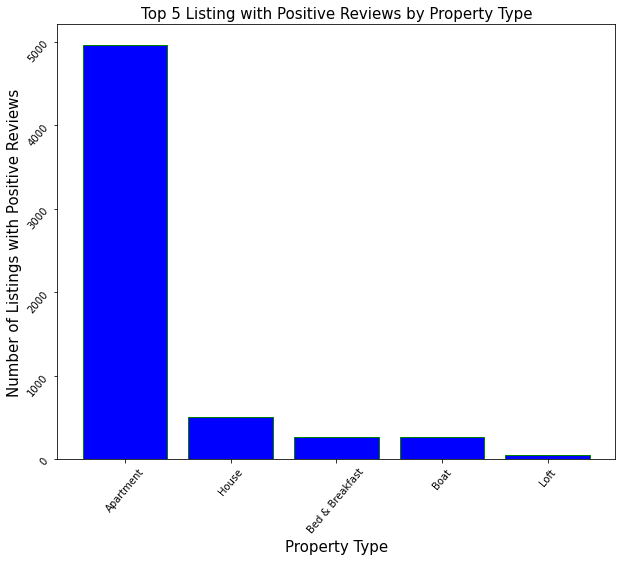

In [80]:
# Create bar chart
plt.figure(figsize=(10,8))
plt.bar(pvt_avg_rating['property_type'], pvt_avg_rating['num_of_listing'], width=0.8, color='Blue',edgecolor='Green',align='center')
plt.xlabel('Property Type', fontsize=15)
plt.ylabel('Number of Listings with Positive Reviews', fontsize=15)
plt.xticks(fontsize=10, rotation=50)
plt.yticks(fontsize=10, rotation=50)
plt.title('Top 5 Listing with Positive Reviews by Property Type', fontsize=15)

In [81]:
pvt_avg_rating_pie = pvt_avg_rating.sort_values(by="num_of_listing",ascending=False).head(10)
pvt_avg_rating_pie

,property_type,avg_rating,max_rating,num_of_listing
0,Apartment,93.903709,100.0,4958
8,House,94.209051,100.0,504
1,Bed & Breakfast,92.946943,100.0,270
2,Boat,94.242783,100.0,265
10,Loft,94.125000,100.0,56


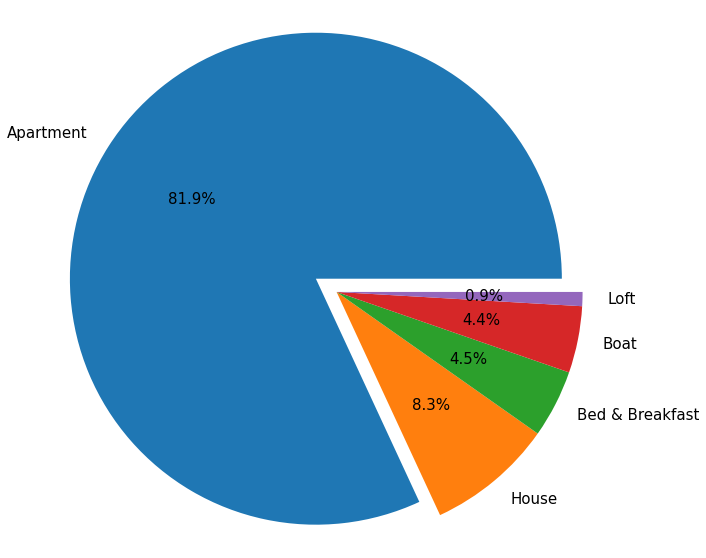

In [82]:
# # plot estimatied frequency of some observations using pie chart
plt.figure(figsize=(10,10))
labels = pvt_avg_rating['property_type']
frequency = pvt_avg_rating['num_of_listing']
myexplode = [0.1, 0, 0, 0, 0]
plt.pie(frequency, labels=labels, explode=myexplode, autopct='%1.1f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.show()



### PROMPT 3: Which neighborhood host the most listings

In [83]:
# Explore how many listing with positive reviews by "neighbourhood_cleansed"
# Create pivot table for number of listing in the neighbourhood
neighborhood_listing = abnb.pivot_table(index=['neighbourhood_cleansed'], values=['id'], aggfunc=['count'])                                                                                                       
neighborhood_listing.head()

,count
,id
neighbourhood_cleansed,
Bijlmer-Centrum,20
Bijlmer-Oost,13
Bos en Lommer,275
Buitenveldert - Zuidas,61
Centrum-Oost,746


In [84]:
# Rest index
neighborhood_listing =  neighborhood_listing.reset_index()
neighborhood_listing.columns =  neighborhood_listing.columns.get_level_values(0)
neighborhood_listing.head()

,neighbourhood_cleansed,count
0,Bijlmer-Centrum,20
1,Bijlmer-Oost,13
2,Bos en Lommer,275
3,Buitenveldert - Zuidas,61
4,Centrum-Oost,746


In [85]:
#Rename column
neighborhood_listing.rename(columns = {'count': 'num_of_listing'}, inplace = True) 
neighborhood_listing.head()

,neighbourhood_cleansed,num_of_listing
0,Bijlmer-Centrum,20
1,Bijlmer-Oost,13
2,Bos en Lommer,275
3,Buitenveldert - Zuidas,61
4,Centrum-Oost,746


In [86]:
# Top 10 listing by neighbourhood
neighbor_sort = neighborhood_listing.sort_values(by='num_of_listing', ascending=False).head(10)
neighbor_sort.head(10)

,neighbourhood_cleansed,num_of_listing
5,Centrum-West,1143
7,De Baarsjes - Oud-West,989
8,De Pijp - Rivierenbuurt,751
4,Centrum-Oost,746
20,Westerpark,550
21,Zuid,428
17,Oud-Oost,307
2,Bos en Lommer,275
14,Oostelijk Havengebied - Indische Buurt,257
16,Oud-Noord,147


Text(0.5, 1.0, 'Top 10 Listings by Neighbourhood')

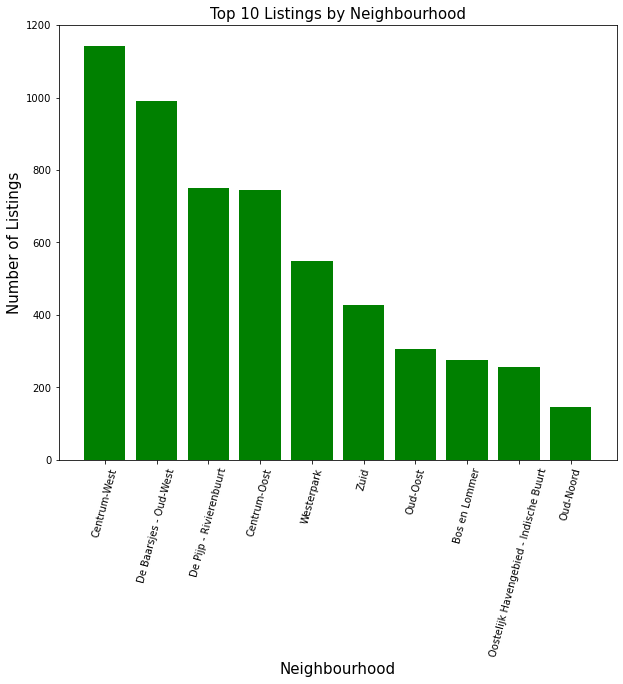

In [87]:
# Create bar char
plt.figure(figsize=(10,8))
plt.bar(neighbor_sort['neighbourhood_cleansed'], neighbor_sort['num_of_listing'], width=0.8, color='Green',align='center')
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.xticks(fontsize=10, rotation=75)
plt.yticks(fontsize=10)
plt.title('Top 10 Listings by Neighbourhood', fontsize=15)

### PROMPT 4: Which neighborhood receive the most positive reviews?

In [88]:
# Pivot table to show Neigborhood with positive and negative reviews 
neighborhood_positive_reviews = abnb_type.pivot_table(index=['neighbourhood_cleansed', 'review_status', 'review_scores_rating'], values=['host_id'], aggfunc=['count'])                                                                                                       
neighborhood_positive_reviews

count
                                                          host_id
neighbourhood_cleansed review_status review_scores_rating        
Bijlmer-Centrum        negative      60.0                       2
                       null          70.0                       1
                       positive      80.0                       1
                                     83.0                       1
                                     85.0                       1
...                                                           ...
Zuid                   positive      96.0                      29
                                     97.0                      40
                                     98.0                      15
                                     99.0                      13
                                     100.0                    128

[489 rows x 1 columns]

In [89]:
# done on the first part using "dropped_neg_review_df"
dropped_neg_review_df = abnb_type
dropped_neg_review_df = abnb_type[abnb_type.review_status != 'negative review']
dropped_neg_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6192 entries, 0 to 7809
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6192 non-null   int64  
 1   property_type           6192 non-null   object 
 2   host_name               6192 non-null   object 
 3   host_id                 6192 non-null   int64  
 4   neighbourhood_cleansed  6192 non-null   object 
 5   review_scores_rating    6192 non-null   float64
 6   number_of_reviews       6192 non-null   int64  
 7   price                   6192 non-null   int64  
 8   guests_included         6192 non-null   int64  
 9   extra_people            6192 non-null   int64  
 10  minimum_nights          6192 non-null   int64  
 11  accommodates            6192 non-null   int64  
 12  review_status           6192 non-null   object 
dtypes: float64(1), int64(8), object(4)
memory usage: 677.2+ KB


In [90]:
# Transfer dataframe to 
neighborhood_positive_reviews_df = dropped_neg_review_df

In [91]:
# Explore neighborhood's positive review categories using pivot table again using 
pvt_most_positive_reviews_neighbor = neighborhood_positive_reviews_df.pivot_table(index=['neighbourhood_cleansed', 'review_status', 'review_scores_rating'], values=['host_id'], aggfunc=['count'])                                                                                                       
pvt_most_positive_reviews_neighbor

count
                                                          host_id
neighbourhood_cleansed review_status review_scores_rating        
Bijlmer-Centrum        negative      60.0                       2
                       null          70.0                       1
                       positive      80.0                       1
                                     83.0                       1
                                     85.0                       1
...                                                           ...
Zuid                   positive      96.0                      29
                                     97.0                      40
                                     98.0                      15
                                     99.0                      13
                                     100.0                    128

[489 rows x 1 columns]

In [92]:
# Explore how many listing with positive reviews by "neighbourhood_cleansed"
pvt_most_positive_reviews_neighbor_count = neighborhood_positive_reviews_df.pivot_table(index=['neighbourhood_cleansed'], values=['host_id'], aggfunc=['count'])                                                                                                       
pvt_most_positive_reviews_neighbor_count

,count
,host_id
neighbourhood_cleansed,
Bijlmer-Centrum,20
Bijlmer-Oost,13
Bos en Lommer,275
Buitenveldert - Zuidas,61
Centrum-Oost,746
Centrum-West,1143
De Aker - Nieuw Sloten,26
De Baarsjes - Oud-West,989


In [93]:
# Pivot for avg rating
pvt_avgreviews_neighbor = dropped_neg_review_df.pivot_table(index=['neighbourhood_cleansed'], values=['review_scores_rating'], aggfunc=['mean', 'count'])
pvt_avgreviews_neighbor.sort_values(by='neighbourhood_cleansed', ascending=True)
pvt_avgreviews_neighbor.head(10)

,mean,count
,review_scores_rating,review_scores_rating
neighbourhood_cleansed,,
Bijlmer-Centrum,87.966868,20
Bijlmer-Oost,87.769231,13
Bos en Lommer,92.997634,275
Buitenveldert - Zuidas,91.573770,61
Centrum-Oost,93.907539,746
Centrum-West,93.069180,1143
De Aker - Nieuw Sloten,90.961538,26
De Baarsjes - Oud-West,93.294590,989


In [94]:
#reset index
pvt_avgreviews_neighbor =  pvt_avgreviews_neighbor.reset_index()
pvt_avgreviews_neighbor.columns =  pvt_avgreviews_neighbor.columns.get_level_values(0)
pvt_avgreviews_neighbor.head(10)

,neighbourhood_cleansed,mean,count
0,Bijlmer-Centrum,87.966868,20
1,Bijlmer-Oost,87.769231,13
2,Bos en Lommer,92.997634,275
3,Buitenveldert - Zuidas,91.573770,61
4,Centrum-Oost,93.907539,746
5,Centrum-West,93.069180,1143
6,De Aker - Nieuw Sloten,90.961538,26
7,De Baarsjes - Oud-West,93.294590,989
8,De Pijp - Rivierenbuurt,93.685785,751
9,Gaasperdam - Driemond,92.444444,9


In [95]:
# Rename columns
pvt_avgreviews_neighbor.rename(columns = {'neighbourhood_cleansed': 'Neighborhood','mean': 'avg_rating','count': 'num_of_listings' }, inplace = True) 
pvt_avgreviews_neighbor.head(10)

,Neighborhood,avg_rating,num_of_listings
0,Bijlmer-Centrum,87.966868,20
1,Bijlmer-Oost,87.769231,13
2,Bos en Lommer,92.997634,275
3,Buitenveldert - Zuidas,91.573770,61
4,Centrum-Oost,93.907539,746
5,Centrum-West,93.069180,1143
6,De Aker - Nieuw Sloten,90.961538,26
7,De Baarsjes - Oud-West,93.294590,989
8,De Pijp - Rivierenbuurt,93.685785,751
9,Gaasperdam - Driemond,92.444444,9


In [96]:
pvt_avgreviews_sort = pvt_avgreviews_neighbor.sort_values(by='num_of_listings', ascending=False).head(10)
pvt_avgreviews_sort

,Neighborhood,avg_rating,num_of_listings
5,Centrum-West,93.069180,1143
7,De Baarsjes - Oud-West,93.294590,989
8,De Pijp - Rivierenbuurt,93.685785,751
4,Centrum-Oost,93.907539,746
20,Westerpark,93.400088,550
21,Zuid,93.764863,428
17,Oud-Oost,93.551627,307
2,Bos en Lommer,92.997634,275
14,Oostelijk Havengebied - Indische Buurt,93.690029,257
16,Oud-Noord,92.689370,147


Text(0.5, 1.0, 'Top 10 Listing with Posistive Reviews by Neighbourhood')

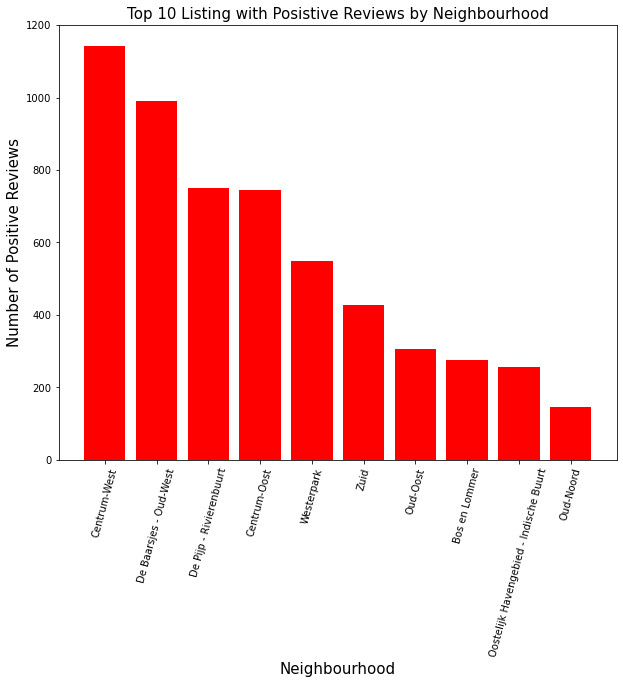

In [97]:
plt.figure(figsize=(10,8))
plt.bar(pvt_avgreviews_sort['Neighborhood'], pvt_avgreviews_sort['num_of_listings'], width=0.8, color='Red',align='center')
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Number of Positive Reviews', fontsize=15)
plt.xticks(fontsize=10, rotation=75)
plt.yticks(fontsize=10)
plt.title('Top 10 Listing with Posistive Reviews by Neighbourhood', fontsize=15)


## Project Step 3: Visualize & Summary

Identity listing/host that generates the most revenue. 

XY% rating with entire 2 beedroom apartment under 200/night. 

Best neighbourhood: Centrum-West

percentage of 2bedroom apartment booked in the best neighbourhood.

percentage of airbeds booked in the best neighbourhood.

percentage of listing in the invested in neightbourhood.

In [98]:
# Create dataframe with best neighbourhood with below condition
abnb_rating = abnb[abnb["room_type"] == "Entire home/apt"]
abnb_rating1 = abnb_rating[abnb_rating["neighbourhood_cleansed"] == "Centrum-West"]
abnb_rating2 = abnb_rating1[abnb_rating1["bedrooms"] == 2]
abnb_rating3 = abnb_rating2[abnb_rating2["price"] <= 200]
abnb_rating3.shape

(180, 34)

In [99]:
# Average rating wtih the condition
pvt_abnb_rating3_score = abnb_rating3.pivot_table(index=['neighbourhood_cleansed', 'bedrooms'], values=['review_scores_rating',], aggfunc=['mean'])                                                                                                       
pvt_abnb_rating3_score
pvt_abnb_rating3_score =  pvt_abnb_rating3_score.reset_index()
pvt_abnb_rating3_score.columns =  pvt_abnb_rating3_score.columns.get_level_values(0)
pvt_abnb_rating3_score
pvt_abnb_rating3_score.rename(columns = { 'mean': 'avg_rating'}, inplace = True) 
pvt_abnb_rating3_score

,neighbourhood_cleansed,bedrooms,avg_rating
0,Centrum-West,2.0,92.877778


In [100]:
# Average price and max price with the condition
pvt_abnb_rating3_price = abnb_rating3.pivot_table(index=['neighbourhood_cleansed', 'bedrooms'], values=['price',], aggfunc=['mean','max'])                                                                                                       
pvt_abnb_rating3_price
pvt_abnb_rating3_price =  pvt_abnb_rating3_price.reset_index()
pvt_abnb_rating3_price.columns =  pvt_abnb_rating3_price.columns.get_level_values(0)
pvt_abnb_rating3_price
pvt_abnb_rating3_price.rename(columns = { 'mean': 'avg_price', 'max': 'max_price'}, inplace = True) 
pvt_abnb_rating3_price

,neighbourhood_cleansed,bedrooms,avg_price,max_price
0,Centrum-West,2.0,157.366667,200


In [101]:
# Most frequent price
mode_price = abnb.mode()['price'][0]
print('Mode of Price:', mode_price)

Mode of Price: 100.0


In [102]:
# Create dataframe with best neighbourhood with 2bedrooms booked
abnb_best_neigh = abnb[abnb["neighbourhood_cleansed"] == "Centrum-West"]
abnb_2bed = abnb_best_neigh[abnb_best_neigh["bedrooms"] == 2]
abnb_2bed.shape

(282, 34)

In [103]:
# Percentage of 2bedroom apartment booked in the best neighbourhood (Centrum-West)
pect_2bed = round(len(abnb_2bed['id']) / (len(abnb_best_neigh['id'])  ) *100,1)
print('Percentage of 2 bedroom apartment booked in the best neighbourhood (Centrum-West):', pect_2bed,'%')

Percentage of 2 bedroom apartment booked in the best neighbourhood (Centrum-West): 24.7 %


In [104]:
# Create dataframe with best neighbourhood with airbeds book
abnb_best_neigh = abnb[abnb["neighbourhood_cleansed"] == "Centrum-West"]
abnb_airbed = abnb_best_neigh[abnb_best_neigh["bed_type"] == 'Airbed']
abnb_airbed.shape

(1, 34)

In [105]:
# Percentage of airbeds booked in the best neighbourhood
pect_air = round(len(abnb_airbed['id']) / (len(abnb_best_neigh['id'])  ) *100,1)
print('Percentage of airbed used in the best neighbourhood (Centrum-West):', pect_air,'%')

Percentage of airbed used in the best neighbourhood (Centrum-West): 0.1 %


In [106]:
# Percentage booking in best neighbourhood
pect_neigh = round(len(abnb_best_neigh['id']) / (len(abnb['id'])  ) *100,1)
print('Percentage of listing the best neighbourhood (Centrum-West):', pect_neigh,'%')

Percentage of listing the best neighbourhood (Centrum-West): 18.5 %


##### Drawback point

In [1088]:
# Create pivot table for number of host in year descending
pvt_table_year = abnb_rev.pivot_table(index=['host_since_year'], values=['host_id'], aggfunc=['count'])
# Reset Index
pvt_table_year =  pvt_table_year.reset_index()
pvt_table_year.columns =  pvt_table_year.columns.get_level_values(0)
# Rename Column
pvt_table_year.rename(columns = {'count': 'num_of_host' }, inplace = True) 
# Number of host by year
pvt_table_year.sort_values(by='host_since_year', ascending=False).head(10)

,host_since_year,num_of_host
7,2015,147
6,2014,1834
5,2013,2068
4,2012,1376
3,2011,561
2,2010,181
1,2009,19
0,2008,6
